In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm,metrics
import tensorflow as tf
from tensorflow import keras
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('cardio_train.csv',sep=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


0    35021
1    34979
Name: cardio, dtype: int64


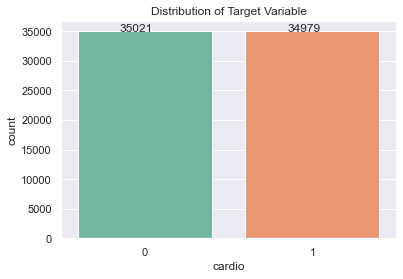

In [7]:
sns.set_theme(style="darkgrid")
print(data.cardio.value_counts())
ax=sns.countplot(x=data['cardio'],palette='Set2')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Distribution of Target Variable')
plt.show()

In [8]:
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

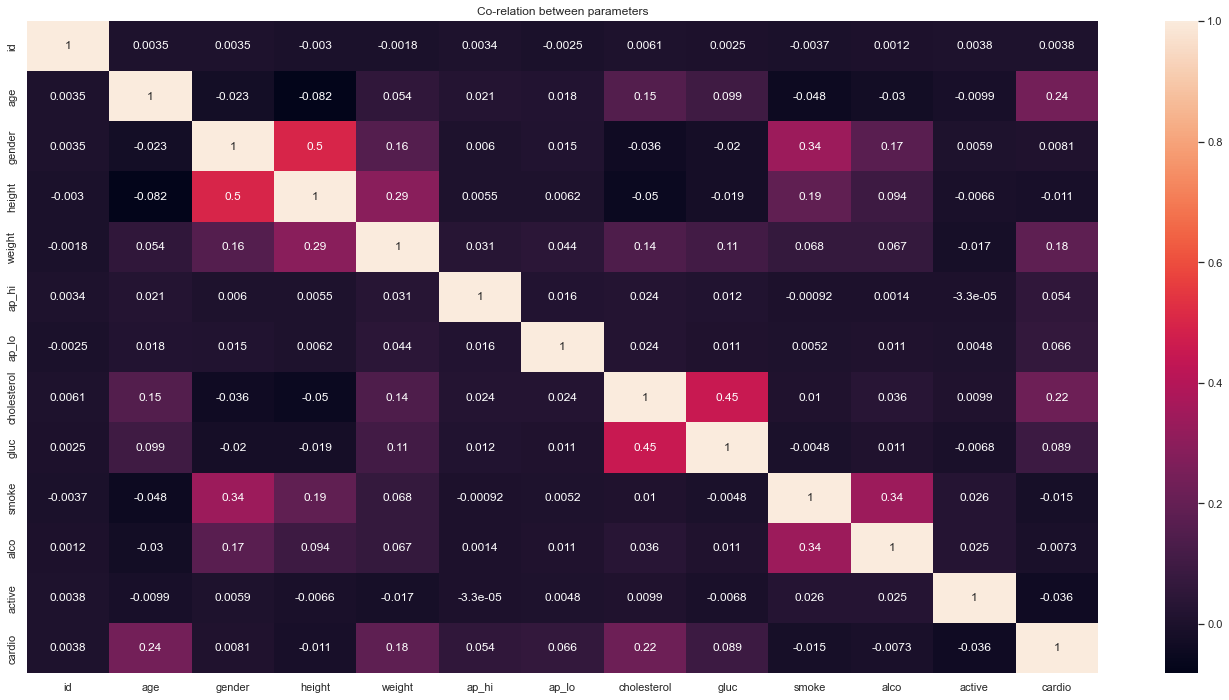

In [9]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True)
plt.title('Co-relation between parameters')
plt.show()

In [10]:
tempData=data

In [11]:
tempData['age']=tempData['age']//365
tempData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
tempData['weight']=tempData.weight.astype(int)

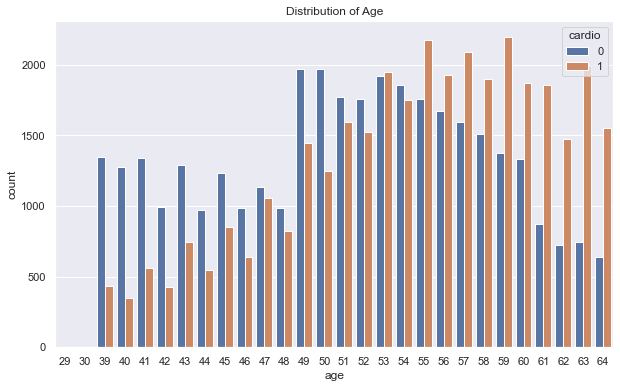

In [13]:
#as age has highest correlation
plt.figure(figsize=(10,6))
sns.countplot(x='age',data=tempData,hue='cardio')
plt.title('Distribution of Age')
plt.show()

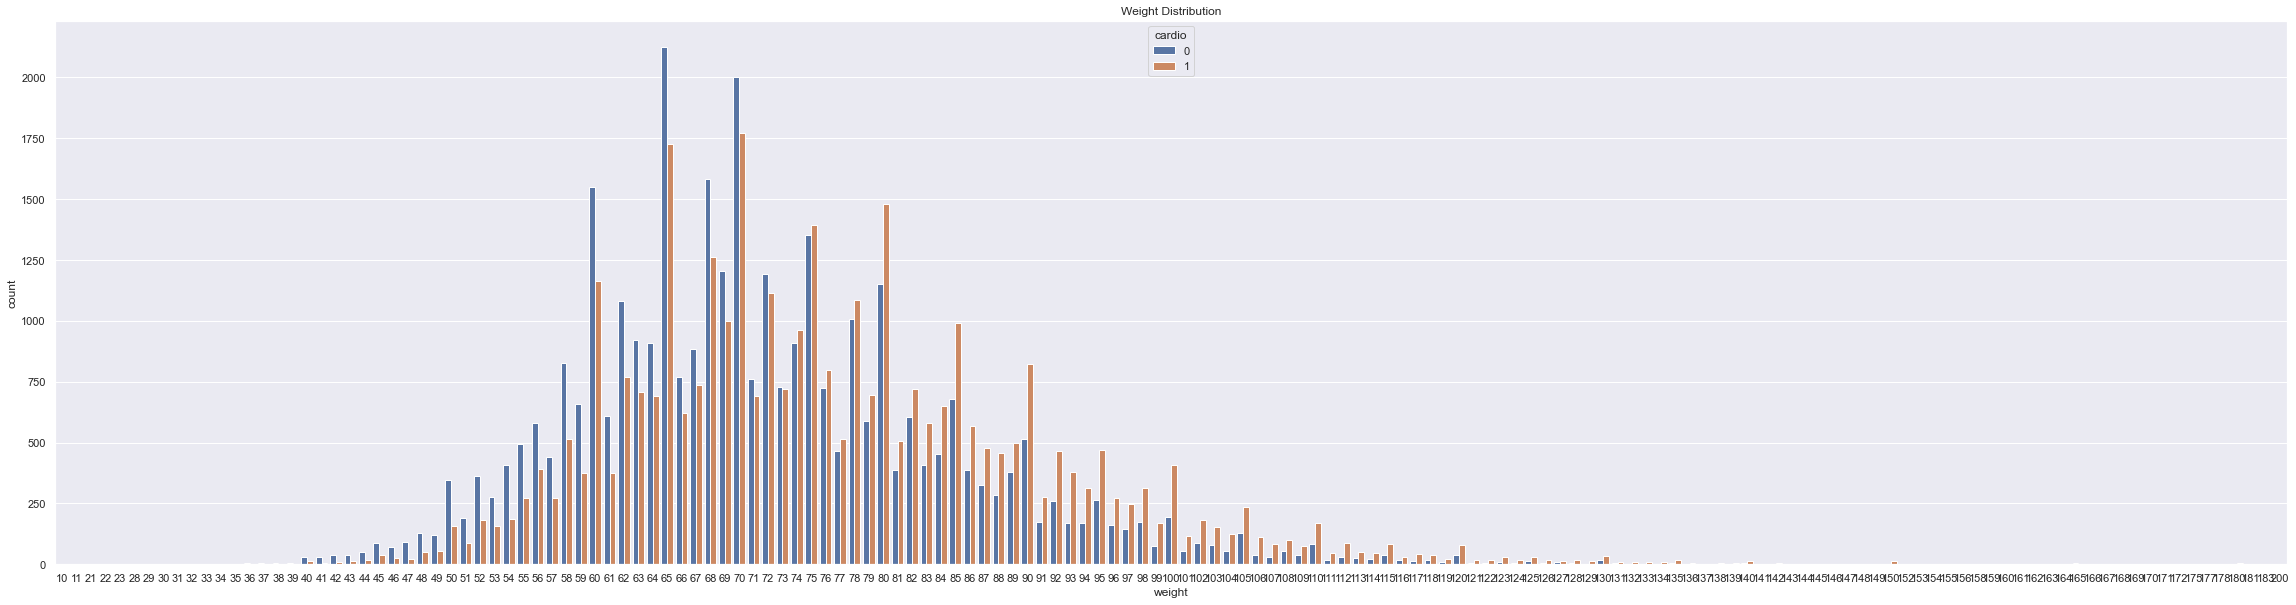

In [14]:
plt.figure(figsize=(40,10))
sns.countplot(x='weight',data=tempData,hue='cardio')
plt.title('Weight Distribution')
plt.show()

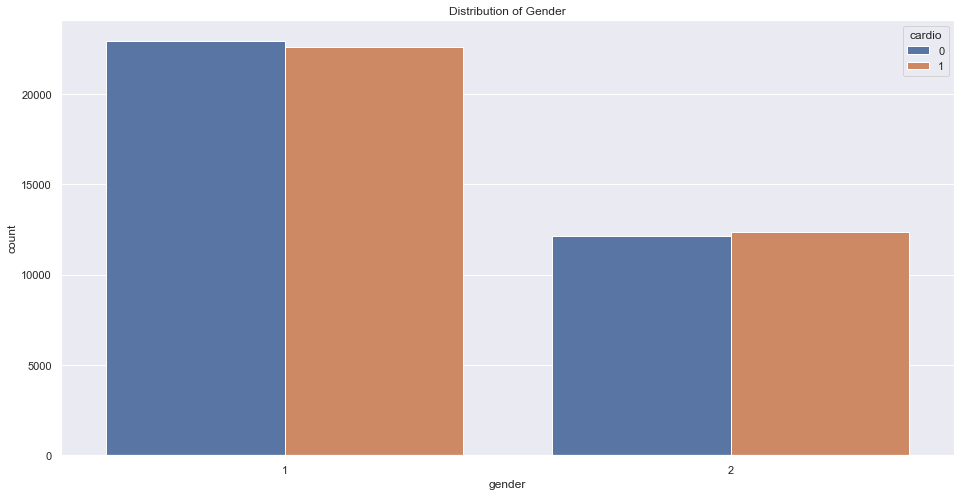

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x='gender',data=tempData,hue='cardio')
plt.title('Distribution of Gender')
plt.show()

# Helper functions

In [16]:
l=data.loc[:,['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
def check_outliers(df):
    for i in l:
        plt.figure(figsize=(8,5))
        sns.set_style('whitegrid')
        sns.boxplot(df[i],orient='v')
        plt.tight_layout()
def check_dist(df):
    for i in l:
        plt.figure(figsize=(8,6))
        sns.distplot(df[i],kde=True) 
        plt.tight_layout()

In [60]:
data.ap_lo.describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

# Visualising Outliers in boxplotting

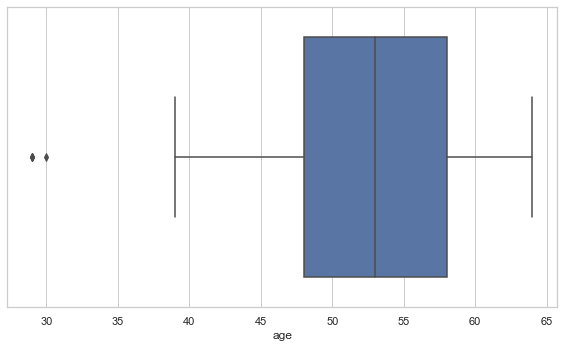

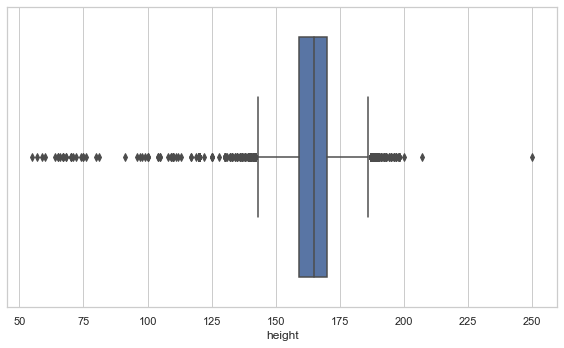

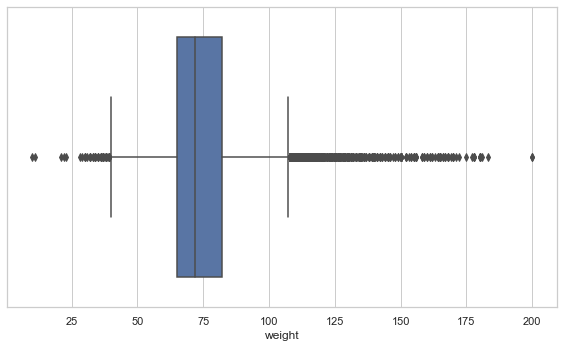

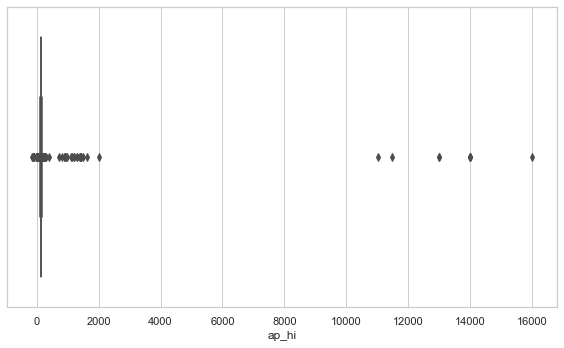

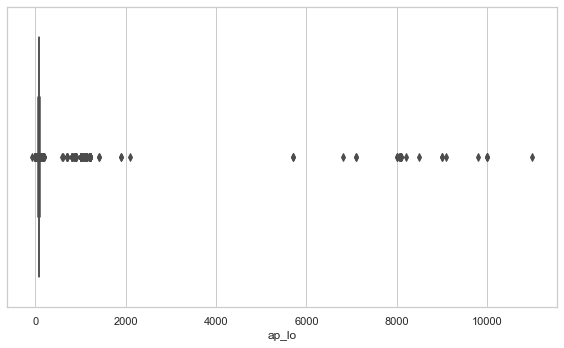

In [18]:
check_outliers(data)

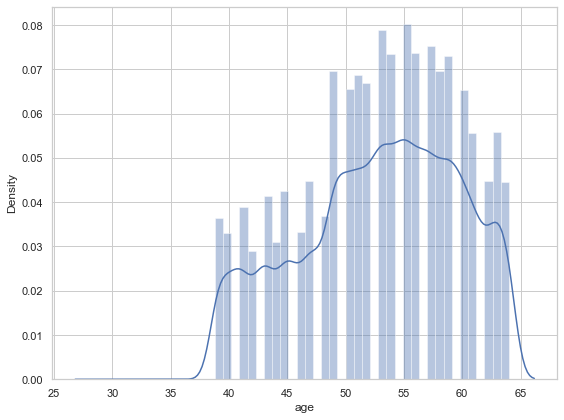

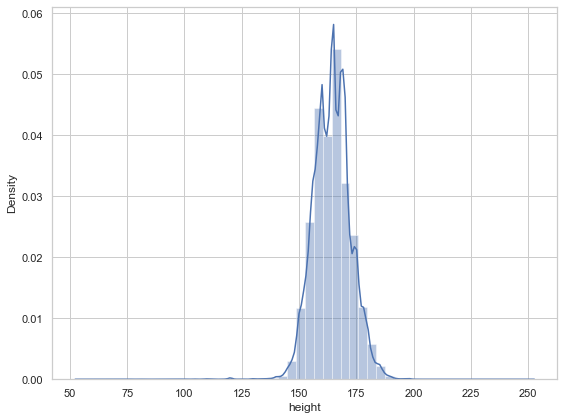

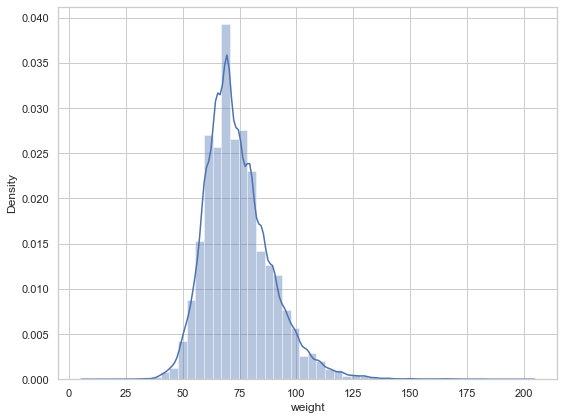

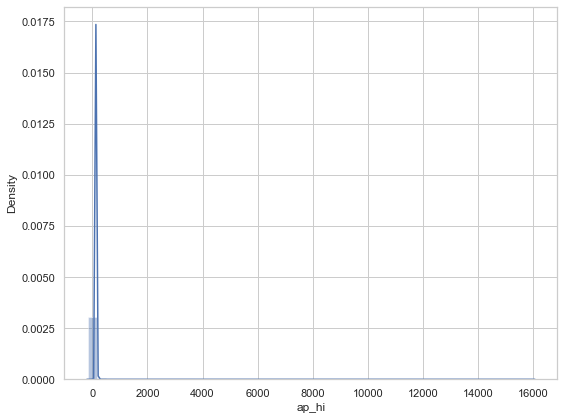

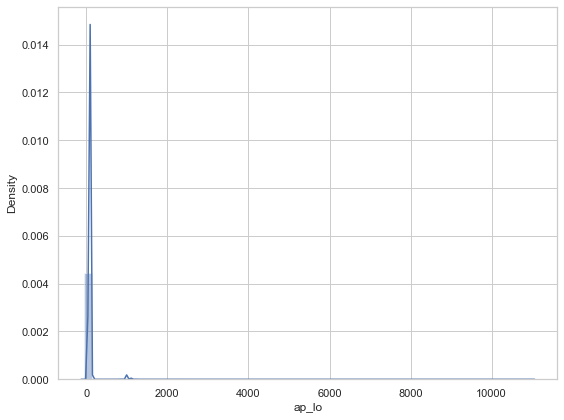

In [19]:
check_dist(data)

# Scaling and normalising data 

In [8]:
c_feature = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
o_feature = ['cholesterol', 'gluc']
b_feature = ['gender', 'smoke', 'alco', 'active', 'cardio']
scaler=preprocessing.MinMaxScaler()
scaled_data=scaler.fit_transform(data[c_feature])

df_normalized=pd.DataFrame(scaled_data)
df_normalized.columns=c_feature

In [9]:
for col in o_feature:
    temp=pd.get_dummies(data[col])
    min_ind=min([ind for ind in temp.columns])
    temp.columns=['{0}_{1}'.format(col,ind) for ind in temp.columns]
    df_normalized=pd.concat([df_normalized,temp.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

In [10]:
df_normalized=pd.concat([df_normalized,data[b_feature]],axis=1)
df_normalized['gender']=df_normalized['gender']-1;
df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.273684,0.016079,0.013550,0,0,0,0,1,0,0,1,0
1,0.730159,0.517949,0.394737,0.017934,0.014453,0,1,0,0,0,0,0,1,1
2,0.624003,0.564103,0.284211,0.017316,0.012647,0,1,0,0,0,0,0,0,1
3,0.528455,0.584615,0.378947,0.018553,0.015357,0,0,0,0,1,0,0,1,1
4,0.516918,0.517949,0.242105,0.015461,0.011743,0,0,0,0,0,0,0,0,0


# Splitting of data for training and testing

In [11]:
df_normalized=df_normalized.dropna()
x=df_normalized.drop('cardio',axis=1)
y=df_normalized['cardio']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
df_normalized.shape

(70000, 14)

# Creating and training model

In [ ]:
svmcla=svm.SVC()
svmcla.fit(x_train,y_train)

In [ ]:
rf_clf=RandomForestClassifer(n_estimators=100)
rf_clf.fit(x_train,y_train)

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

In [ ]:
model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2)

# Saving and Loading Model

In [42]:
with open('sv_model.pkl', 'wb') as fid:
    pickle.dump(svmcla, fid)

NameError: name 'svmcla' is not defined

In [ ]:
with open('rf_model.pkl','wb') as fid:
  pickle.dump(rf_clf,fid)

In [ ]:
with open('NB_model.pkl','wb') as fid:
  pickle.dump(nb_model,fid)

In [ ]:
model.save('Tf_model.h5')

In [6]:
svmcl = pickle.load(open('svm_model.pkl','rb'))
rf_clf = pickle.load(open('rf_model.pkl','rb'))
nb_model = pickle.load(open('NB_model.pkl','rb'))
model = tf.keras.models.load_model('Tf_model.h5')

# Evaluation of model

In [12]:
def evaluate_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accuracy",metrics.accuracy_score(y_test,y_pred))
    print("Precision",metrics.precision_score(y_test,y_pred))

In [13]:
evaluate_model(rf_clf,x_test,y_test)
feature_imp = pd.Series(rf_clf.feature_importances_,index=x_test.columns).sort_values(ascending=False)
feature_imp

Accuracy 0.6662142857142858
Precision 0.6136209074128048


age              0.300651
ap_hi            0.176696
weight           0.175222
height           0.156223
ap_lo            0.094280
cholesterol_3    0.025641
gender           0.014744
active           0.013124
cholesterol_2    0.010737
gluc_2           0.008890
smoke            0.008460
gluc_3           0.008245
alco             0.007088
dtype: float64

In [33]:
evaluate_model(svmcl,x_test,y_test)

Accuracy 0.6469285714285714
Precision 0.6500797910924125


# Application

In [101]:
def calculate(age,height,weight,ap_hi,ap_lo,cholesterol,gluc,gender,smoke,alco,active):
    age=float(age*365/(64-29))
    height=float(height/200)
    weight=float(weight/(200-10))
    ap_hi=float(ap_hi/(16020-(-150)))
    ap_lo=float(ap_lo/(11000-(-70)))
    arr=np.array([age,height,weight,ap_hi,ap_lo])
    if cholesterol==1:
        arr=np.append(arr,[1,0])
    else:
        arr=np.append(arr,[0,1])
    if gluc==1:
        arr=np.append(arr,[1,0])
    else:
        arr=np.append(arr,[0,1]) 
    arr=np.append(arr,[gender,smoke,alco,active])
    arr=np.reshape(arr,(-1,13))
    ans=rf_clf.predict(arr)
    if ans==0:
        print('You are safe')
    else:
        print('You have cardio vascular Disease')
    tempdf=pd.DataFrame(arr)
    print()
#age in years
#height in cm
#weight in kg
calculate(200,168,55,200,100,1,1,1,1,1,0)
   
    

You are safe



In [74]:
x.iloc[0]

age              0.600000
height           0.579487
weight           0.273684
ap_hi            0.016079
ap_lo            0.013550
cholesterol_2    0.000000
cholesterol_3    0.000000
gluc_2           0.000000
gluc_3           0.000000
gender           1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 0, dtype: float64

In [1]:
from tkinter import *
from tkinter import ttk
window = Tk()
window.title("Welcome to TutorialsPoint")
window.geometry('400x400')
window.configure(background = "grey");
a = Label(window ,text = "Age").grid(row = 0,column = 0)
b = Label(window ,text = "Height").grid(row = 1,column = 0)
c = Label(window ,text = "Weight").grid(row = 2,column = 0)
d = Label(window ,text = "Gender ").grid(row = 3,column = 0)
e = Label(window ,text = "Systolic blood pressure ").grid(row = 4,column = 0)
f = Label(window ,text = "Diastolic blood pressure").grid(row = 5,column = 0)
g = Label(window ,text = "Cholesterol").grid(row = 6,column = 0)
h = Label(window ,text = "Glucose").grid(row = 7,column = 0)
i = Label(window ,text = "Smoking").grid(row = 8,column = 0)
j = Label(window ,text = "Alcohol intake").grid(row = 9,column = 0)
k = Label(window ,text = "Physical activity").grid(row = 10,column = 0)
a1 = Entry(window).grid(row = 0,column = 1)
b1 = Entry(window).grid(row = 1,column = 1)
c1 = Entry(window).grid(row = 2,column = 1)
d1 = Entry(window).grid(row = 3,column = 1)
e1 = Entry(window).grid(row = 4,column = 1)
f1 = Entry(window).grid(row = 5,column = 1)
g1 = Entry(window).grid(row = 6,column = 1)
h1 = Entry(window).grid(row = 7,column = 1)
i1 = Entry(window).grid(row = 8,column = 1)
j1 = Entry(window).grid(row = 9,column = 1)
k1 = Entry(window).grid(row = 10,column = 1)
def clicked():
    age=float(a1.get()*365/(64-29))
    height=float(b1.get()/200)
    weight=float(c1.get()/(200-10))
    ap_hi=float(d1.get()/(16020-(-150)))
    ap_lo=float(d2.get()/(11000-(-70)))
   
btn = ttk.Button(window ,text="Submit",command='clicked').grid(row=11,column=0)
window.mainloop()

In [ ]:
mod=pickle.load(open('model.pkl', 'rb'))